In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()
df = pd.read_csv("netflix.csv")
df.head()

Saving netflix.csv to netflix.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.isna().sum()
netflix = df.copy()

In [ ]:
netflix["datetime"]=pd.to_datetime(netflix["date_added"],format='mixed')
netflix["director"]=netflix["director"].fillna("Unknown Director")
netflix["cast"]=netflix["cast"].fillna("Unknown Cast")
netflix["country"]=netflix["country"].fillna("Unknown Country")
netflix["rating"]=netflix["rating"].fillna("Unknown Rating")
netflix["duration"]=netflix["duration"].fillna("Unknown")
netflix["date_added"]=netflix["datetime"].dt.date
netflix["cast"]=netflix["cast"].str.split(",")
netflix["listed_in"]=netflix["listed_in"].str.split(",")
netflix_expl = netflix.explode('cast')
netflix_expl = netflix_expl.explode('listed_in')
netflix_expl["date_added"]=netflix_expl["date_added"].fillna("Unknown Date")

In [ ]:
netflix_expl.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
netflix_expl

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,datetime
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019-03-02
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2019-03-02
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019-03-02
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019-03-02


In [ ]:
ShowsbyCast=pd.DataFrame(netflix_expl.groupby("cast")["show_id"].nunique().sort_values(ascending=False).head(10))

In [ ]:
ShowsbyCast = ShowsbyCast[1:]
ShowsbyCast

,show_id
cast,
Anupam Kher,39
Rupa Bhimani,31
Takahiro Sakurai,30
Julie Tejwani,28
Om Puri,27
Rajesh Kava,26
Shah Rukh Khan,26
Boman Irani,25
Paresh Rawal,25


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ' Anupam Kher'),
  Text(1, 0, ' Rupa Bhimani'),
  Text(2, 0, ' Takahiro Sakurai'),
  Text(3, 0, ' Julie Tejwani'),
  Text(4, 0, ' Om Puri'),
  Text(5, 0, ' Rajesh Kava'),
  Text(6, 0, 'Shah Rukh Khan'),
  Text(7, 0, ' Boman Irani'),
  Text(8, 0, ' Paresh Rawal')])

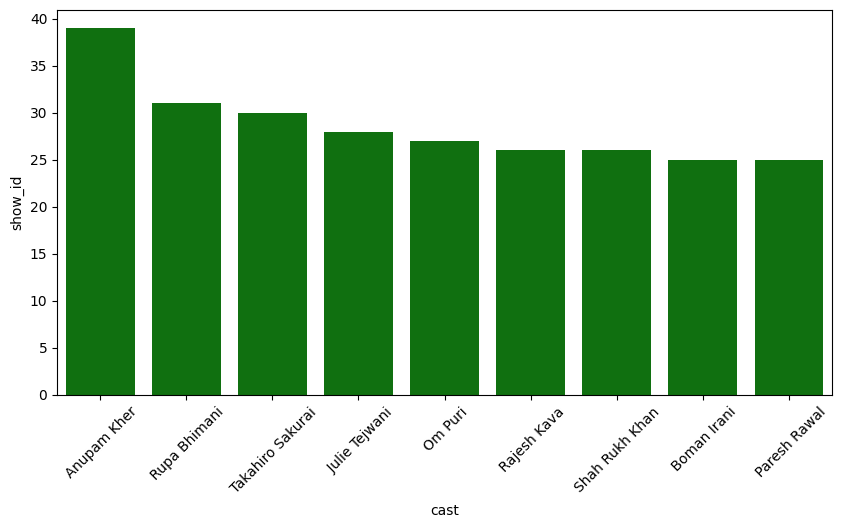

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=ShowsbyCast, x="cast",y="show_id",color="green")
plt.xticks(rotation=45)

In [ ]:
ShowsbyCountry=pd.DataFrame(netflix_expl.groupby("country")["show_id"].nunique().sort_values(ascending=False).head(10))
ShowsbyCountry

,show_id
country,
United States,2818
India,972
Unknown Country,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'Unknown Country'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Japan'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Mexico')])

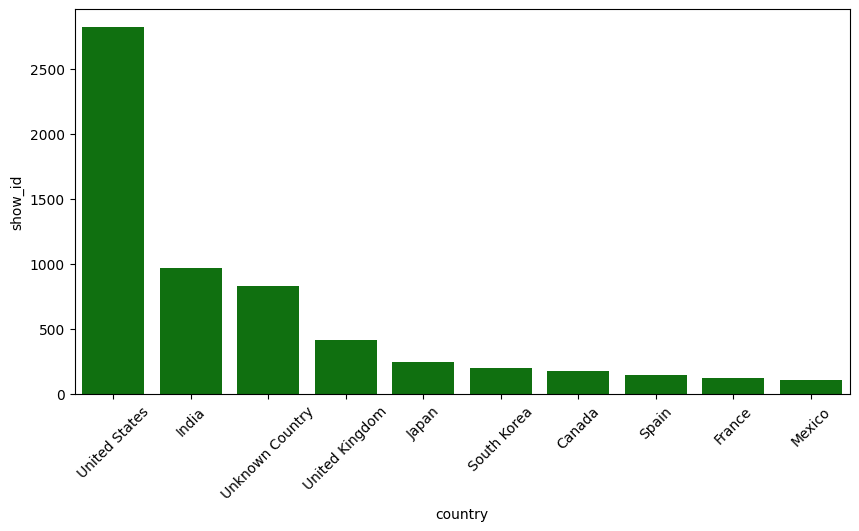

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=ShowsbyCountry, x="country",y="show_id",color="green")
plt.xticks(rotation=45)

In [ ]:
ShowsbyDirector=pd.DataFrame(netflix_expl.groupby("director")["show_id"].nunique().sort_values(ascending=False).head(10))
ShowsbyDirector = ShowsbyDirector[1:]

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Raúl Campos, Jan Suter'),
  Text(2, 0, 'Suhas Kadav'),
  Text(3, 0, 'Marcus Raboy'),
  Text(4, 0, 'Jay Karas'),
  Text(5, 0, 'Cathy Garcia-Molina'),
  Text(6, 0, 'Youssef Chahine'),
  Text(7, 0, 'Jay Chapman'),
  Text(8, 0, 'Martin Scorsese')])

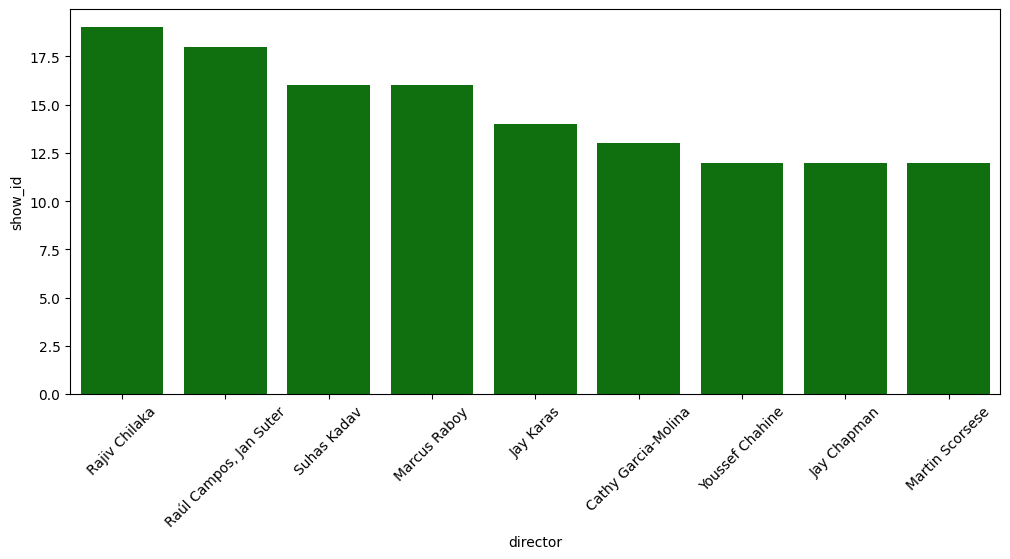

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=ShowsbyDirector, x="director",y="show_id",color="green")
plt.xticks(rotation=45)

In [ ]:
ReleaseYear = pd.DataFrame(netflix_expl.groupby("release_year")["show_id"].nunique().sort_values(ascending=False).head(10))
ShowsbyRating = pd.DataFrame(netflix_expl.groupby("rating")["show_id"].nunique().sort_values(ascending=False).head(10))
popular_Genre = pd.DataFrame(netflix_expl.groupby("listed_in")["show_id"].nunique().sort_values(ascending=False).head(10))
TypeofShow = pd.DataFrame(netflix_expl.groupby("type")["show_id"].nunique().sort_values(ascending=False).head(10))
netflix_expl["year_added"] = netflix_expl["datetime"].dt.year
YearbyShow= pd.DataFrame(netflix_expl.groupby("year_added")["show_id"].nunique().sort_values(ascending=False).head(10))


1. Find the counts of each categorical variable both using graphical and non
graphical analysis.

In [ ]:
TypeofShow,ShowsbyDirector,ShowsbyCast,ShowsbyCountry,YearbyShow,ReleaseYear,ShowsbyRating,popular_Genre


(         show_id
 type            
 Movie       6131
 TV Show     2676,
                         show_id
 director                       
 Rajiv Chilaka                19
 Raúl Campos, Jan Suter       18
 Suhas Kadav                  16
 Marcus Raboy                 16
 Jay Karas                    14
 Cathy Garcia-Molina          13
 Youssef Chahine              12
 Jay Chapman                  12
 Martin Scorsese              12,
                    show_id
 cast                      
  Anupam Kher            39
  Rupa Bhimani           31
  Takahiro Sakurai       30
  Julie Tejwani          28
  Om Puri                27
  Rajesh Kava            26
 Shah Rukh Khan          26
  Boman Irani            25
  Paresh Rawal           25,
                  show_id
 country                 
 United States       2818
 India                972
 Unknown Country      831
 United Kingdom       419
 Japan                245
 South Korea          199
 Canada               181
 Spain              

Text(0, 0.5, '')

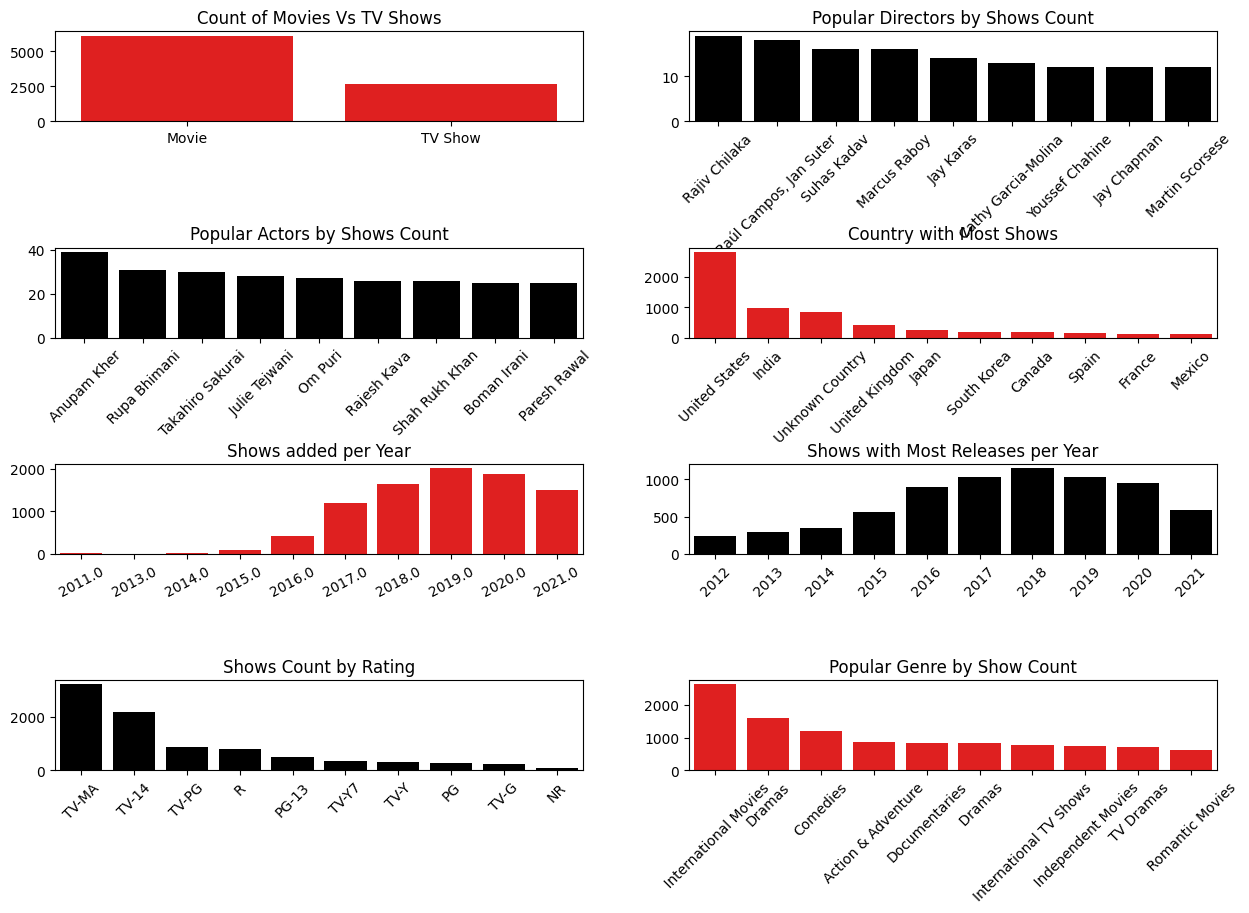

In [ ]:
plt.figure(figsize=(15,11))
plt.subplot(8,2,1)
sns.barplot(data=TypeofShow, x="type",y="show_id",color="red")
plt.title("Count of Movies Vs TV Shows")
plt.xlabel("")
plt.ylabel("")
plt.subplot(8,2,2)
sns.barplot(data=ShowsbyDirector, x="director",y="show_id",color="black")
plt.title("Popular Directors by Shows Count")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.subplot(8,2,5)
sns.barplot(data=ShowsbyCast, x="cast",y="show_id",color="black")
plt.xticks(rotation=45)
plt.title("Popular Actors by Shows Count")
plt.xlabel("")
plt.ylabel("")
plt.subplot(8,2,6)
sns.barplot(data=ShowsbyCountry, x="country",y="show_id",color="red")
plt.xticks(rotation=45)
plt.title("Country with Most Shows")
plt.xlabel("")
plt.ylabel("")
plt.subplot(8,2,9)
sns.barplot(data=YearbyShow, x="year_added",y="show_id",color="red")
plt.xticks(rotation=28)
plt.title("Shows added per Year")
plt.xlabel("")
plt.ylabel("")
plt.subplot(8,2,10)
sns.barplot(data=ReleaseYear, x="release_year",y="show_id",color="black")
plt.xticks(rotation=45)
plt.title("Shows with Most Releases per Year")
plt.xlabel("")
plt.ylabel("")
plt.subplot(8,2,13)
sns.barplot(data=ShowsbyRating, x="rating",y="show_id",color="black")
plt.xticks(rotation=45)
plt.title("Shows Count by Rating")
plt.xlabel("")
plt.ylabel("")
plt.subplot(8,2,14)
sns.barplot(data=popular_Genre, x="listed_in",y="show_id",color="red")
plt.xticks(rotation=45)
plt.title("Popular Genre by Show Count")
plt.xlabel("")
plt.ylabel("")


2. Comparison of tv shows vs. movies.

In [ ]:
netflix_expl[netflix_expl["type"]=="Movie"].groupby("country")["show_id"].nunique().sort_values(ascending=False).head(10)

,show_id
country,
United States,2058
India,893
Unknown Country,440
United Kingdom,206
Canada,122
Spain,97
Egypt,92
Nigeria,86
Indonesia,77


In [ ]:
netflix_expl[netflix_expl["type"]=="TV Show"].groupby("country")["show_id"].nunique().sort_values(ascending=False).head(10)

,show_id
country,
United States,760
Unknown Country,391
United Kingdom,213
Japan,169
South Korea,158
India,79
Taiwan,68
Canada,59
France,49


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Unknown Country'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'South Korea'),
  Text(5, 0, 'India'),
  Text(6, 0, 'Taiwan'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Australia')])

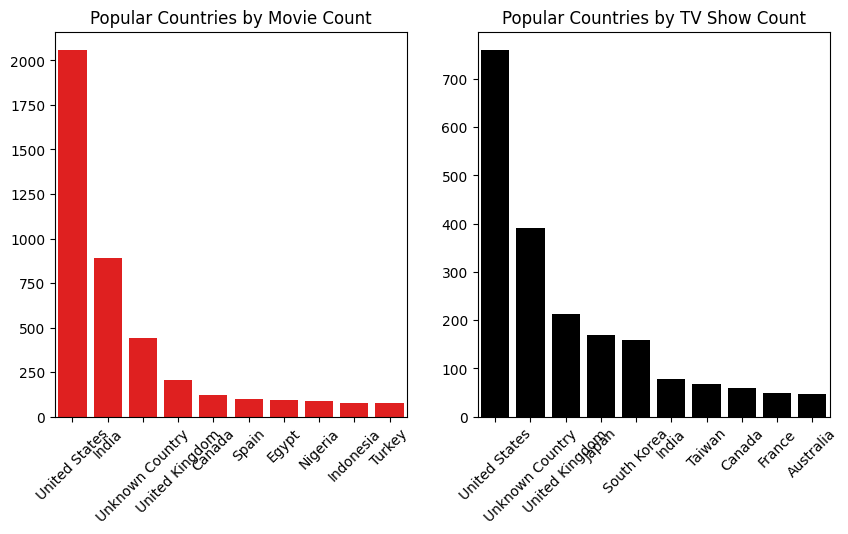

In [ ]:
TVShowsperCountry=pd.DataFrame(netflix_expl[netflix_expl["type"]=="TV Show"].groupby("country")["show_id"].nunique().sort_values(ascending=False).head(10))
MoviesperCountry = pd.DataFrame(netflix_expl[netflix_expl["type"]=="Movie"].groupby("country")["show_id"].nunique().sort_values(ascending=False).head(10))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=MoviesperCountry, x="country",y="show_id",color="red")
plt.title("Popular Countries by Movie Count")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(data=TVShowsperCountry, x="country",y="show_id",color="black")
plt.title("Popular Countries by TV Show Count")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)


3. What is the best time to launch a TV show?

In [ ]:
netflix_expl["week_added"] = netflix_expl["datetime"].dt.isocalendar().week
netflix_expl[netflix_expl["type"]=="Movie"].groupby("week_added")["show_id"].nunique().sort_values(ascending=False).head(10)

,show_id
week_added,
1,316
44,243
40,215
9,207
26,195
35,189
31,185
13,174
18,173


In [ ]:
netflix_expl[netflix_expl["type"]=="TV Show"].groupby("week_added")["show_id"].nunique().sort_values(ascending=False).head(10)

,show_id
week_added,
27,86
31,83
13,76
44,75
24,75
35,74
5,73
26,73
40,72


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '5'),
  Text(1, 0, '13'),
  Text(2, 0, '24'),
  Text(3, 0, '26'),
  Text(4, 0, '27'),
  Text(5, 0, '31'),
  Text(6, 0, '35'),
  Text(7, 0, '40'),
  Text(8, 0, '44'),
  Text(9, 0, '50')])

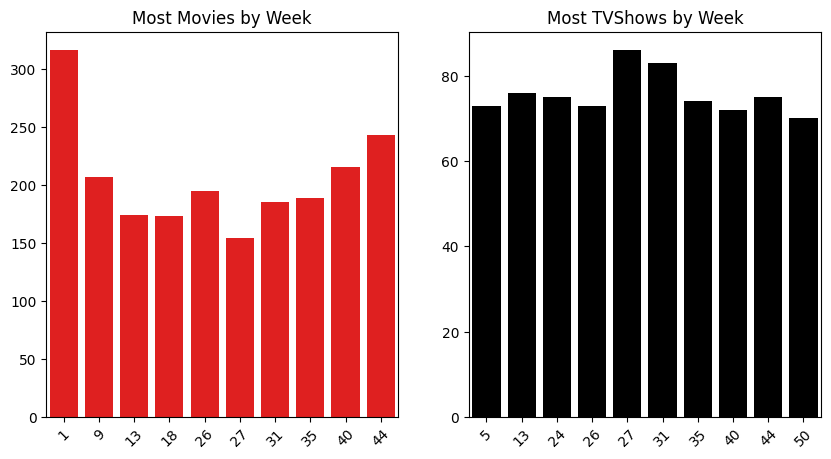

In [ ]:
MoviesbyWeek=pd.DataFrame(netflix_expl[netflix_expl["type"]=="Movie"].groupby("week_added")["show_id"].nunique().sort_values(ascending=False).head(10))
TVShowsbyWeek=pd.DataFrame(netflix_expl[netflix_expl["type"]=="TV Show"].groupby("week_added")["show_id"].nunique().sort_values(ascending=False).head(10))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=MoviesbyWeek, x="week_added",y="show_id",color="red")
plt.title("Most Movies by Week")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(data=TVShowsbyWeek, x="week_added",y="show_id",color="black")
plt.title("Most TVShows by Week")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)


In [ ]:
netflix_expl["month_added"] = netflix_expl["datetime"].dt.month_name()

In [ ]:
netflix_expl[netflix_expl["type"]=="Movie"].groupby("month_added")["show_id"].nunique().sort_values(ascending=False).head(12)

,show_id
month_added,
July,565
April,550
December,547
January,546
October,545
March,529
September,519
August,519
November,498


In [ ]:
netflix_expl[netflix_expl["type"]=="TV Show"].groupby("month_added")["show_id"].nunique().sort_values(ascending=False).head(12)

,show_id
month_added,
December,266
July,262
September,251
August,236
June,236
October,215
April,214
March,213
November,207


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'December'),
  Text(1, 0, 'July'),
  Text(2, 0, 'September'),
  Text(3, 0, 'August'),
  Text(4, 0, 'June'),
  Text(5, 0, 'October'),
  Text(6, 0, 'April'),
  Text(7, 0, 'March'),
  Text(8, 0, 'November'),
  Text(9, 0, 'May'),
  Text(10, 0, 'January'),
  Text(11, 0, 'February')])

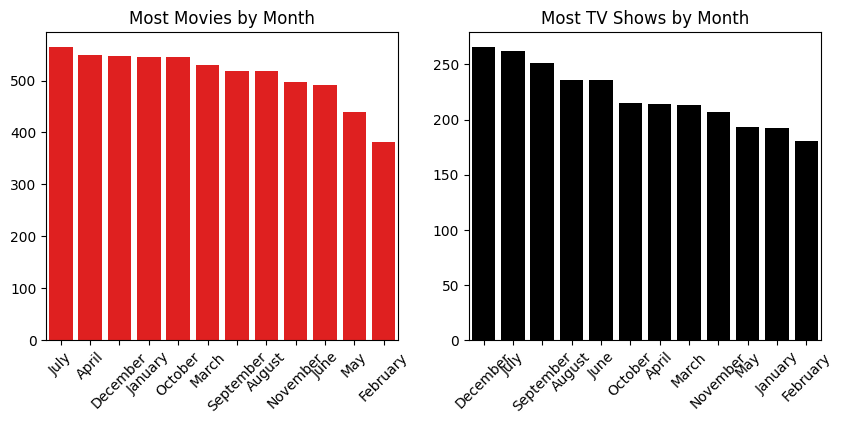

In [ ]:
MoviesbyMonth=pd.DataFrame(netflix_expl[netflix_expl["type"]=="Movie"].groupby("month_added")["show_id"].nunique().sort_values(ascending=False).head(12))
TVShowsbyMonth=pd.DataFrame(netflix_expl[netflix_expl["type"]=="TV Show"].groupby("month_added")["show_id"].nunique().sort_values(ascending=False).head(12))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(data=MoviesbyMonth, x="month_added",y="show_id",color="red")
plt.title("Most Movies by Month")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(data=TVShowsbyMonth, x="month_added",y="show_id",color="black")
plt.title("Most TV Shows by Month")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)

In [ ]:
netflix_expl["dayofweek"]=netflix_expl["datetime"].dt.day_name()
netflix_expl.groupby("dayofweek")["show_id"].nunique().sort_values(ascending=False).head(10)

,show_id
dayofweek,
Friday,2498
Thursday,1396
Wednesday,1288
Tuesday,1197
Monday,851
Saturday,816
Sunday,751


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Wednesday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Saturday'),
  Text(5, 0, 'Monday'),
  Text(6, 0, 'Sunday')])

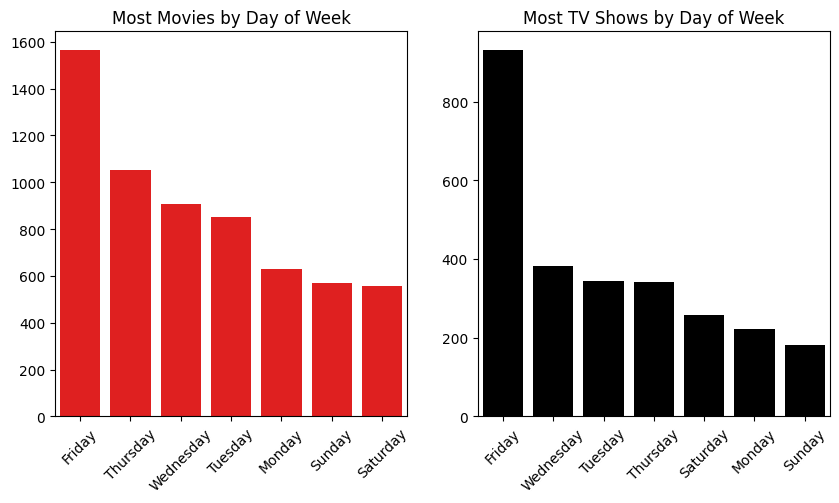

In [ ]:
MoviesbyDay=pd.DataFrame(netflix_expl[netflix_expl["type"]=="Movie"].groupby("dayofweek")["show_id"].nunique().sort_values(ascending=False).head(10))
TVShowsbyDay=pd.DataFrame(netflix_expl[netflix_expl["type"]=="TV Show"].groupby("dayofweek")["show_id"].nunique().sort_values(ascending=False).head(10))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=MoviesbyDay, x="dayofweek",y="show_id",color="red")
plt.title("Most Movies by Day of Week")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(data=TVShowsbyDay, x="dayofweek",y="show_id",color="black")
plt.title("Most TV Shows by Day of Week")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Alastair Fothergill'),
  Text(1, 0, 'Iginio Straffi'),
  Text(2, 0, 'Stan Lathan'),
  Text(3, 0, 'Shin Won-ho'),
  Text(4, 0, 'Ken Burns'),
  Text(5, 0, 'Hsu Fu-chun'),
  Text(6, 0, 'Rob Seidenglanz'),
  Text(7, 0, 'Alejandro Lozano'),
  Text(8, 0, 'Alex Gibney')])

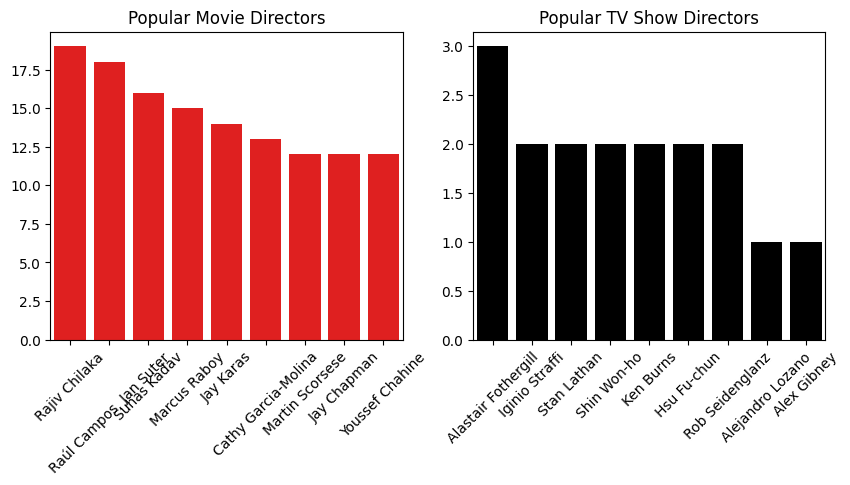

In [ ]:
TopMovieDirector=pd.DataFrame(netflix_expl[netflix_expl["type"]=="Movie"].groupby("director")["show_id"].nunique().sort_values(ascending=False).head(10))
TopTVShowDirector=pd.DataFrame(netflix_expl[netflix_expl["type"]=="TV Show"].groupby("director")["show_id"].nunique().sort_values(ascending=False).head(10))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(data=TopMovieDirector[1:], x="director",y="show_id",color="red")
plt.title("Popular Movie Directors")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(data=TopTVShowDirector[1:], x="director",y="show_id",color="black")
plt.title("Popular TV Show Directors")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ' Takahiro Sakurai'),
  Text(1, 0, ' Yuki Kaji'),
  Text(2, 0, ' Junichi Suwabe'),
  Text(3, 0, ' Ai Kayano'),
  Text(4, 0, 'David Attenborough'),
  Text(5, 0, ' Daisuke Ono'),
  Text(6, 0, ' Yoshimasa Hosoya'),
  Text(7, 0, ' Takehito Koyasu'),
  Text(8, 0, ' Yuichi Nakamura')])

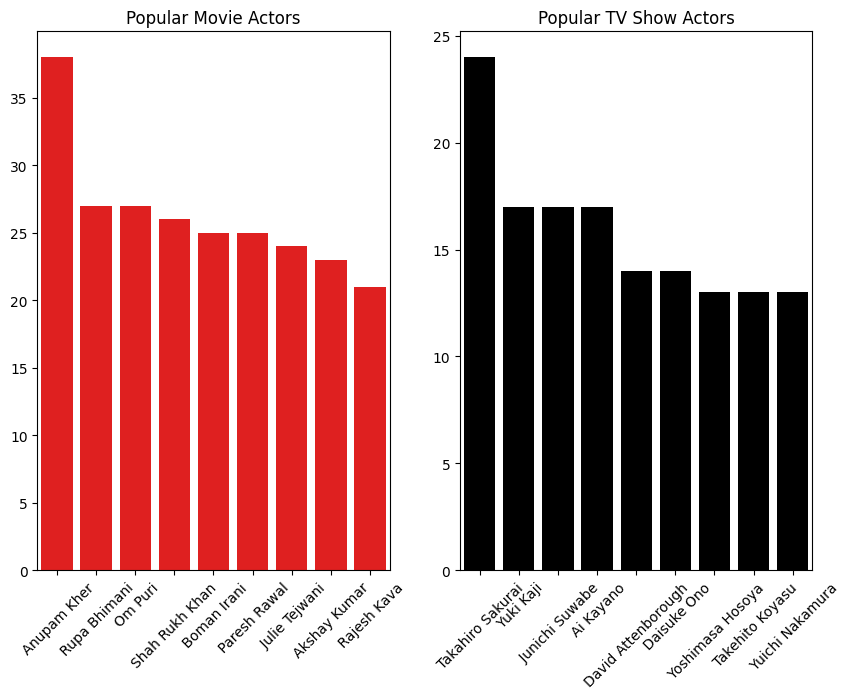

In [ ]:
TopMovieCast=pd.DataFrame(netflix_expl[netflix_expl["type"]=="Movie"].groupby("cast")["show_id"].nunique().sort_values(ascending=False).head(10))
TopTVShowCast=pd.DataFrame(netflix_expl[netflix_expl["type"]=="TV Show"].groupby("cast")["show_id"].nunique().sort_values(ascending=False).head(10))
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.barplot(data=TopMovieCast[1:], x="cast",y="show_id",color="red")
plt.title("Popular Movie Actors")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(data=TopTVShowCast[1:], x="cast",y="show_id",color="black")
plt.title("Popular TV Show Actors")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'International TV Shows'),
  Text(1, 0, ' TV Dramas'),
  Text(2, 0, ' International TV Shows'),
  Text(3, 0, ' TV Comedies'),
  Text(4, 0, 'Crime TV Shows'),
  Text(5, 0, "Kids' TV"),
  Text(6, 0, ' Romantic TV Shows'),
  Text(7, 0, 'British TV Shows'),
  Text(8, 0, 'Docuseries'),
  Text(9, 0, 'Anime Series')])

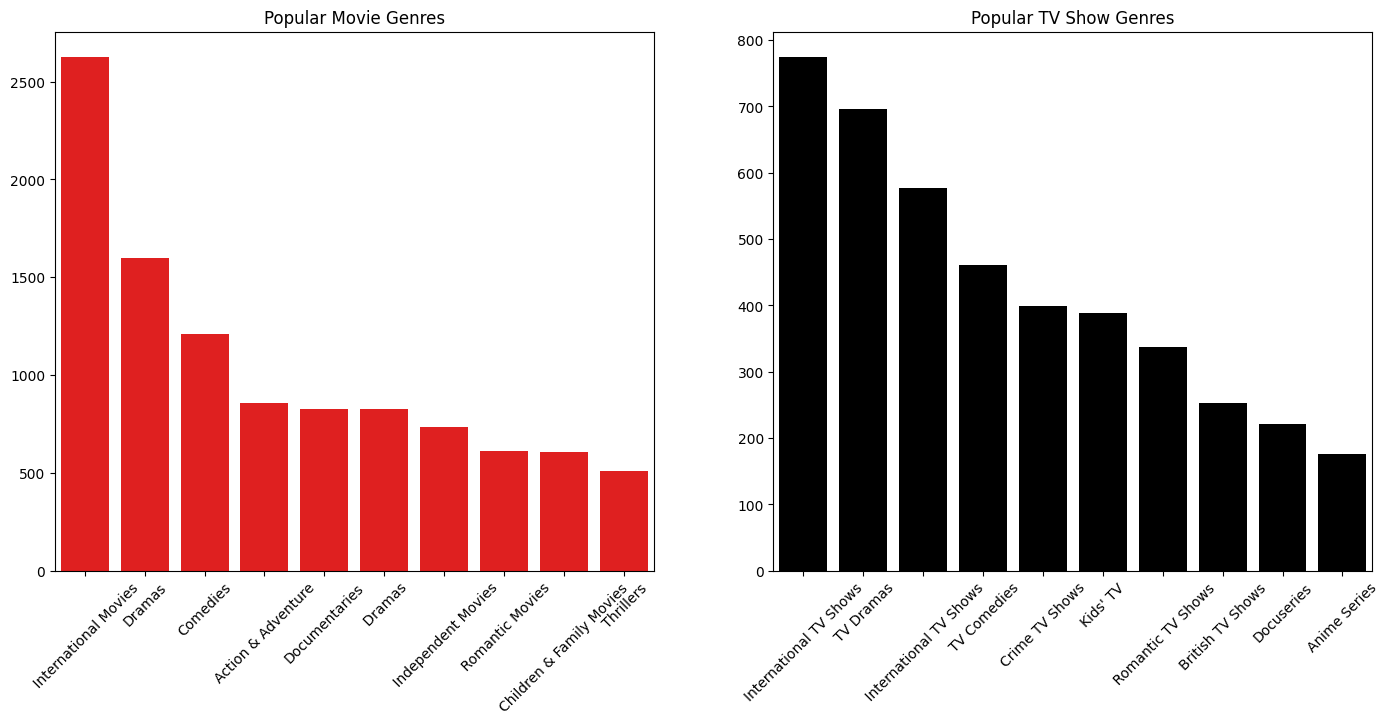

In [ ]:
TopMovieGenre=pd.DataFrame(netflix_expl[netflix_expl["type"]=="Movie"].groupby("listed_in")["show_id"].nunique().sort_values(ascending=False).head(10))
TopTVShowGenre=pd.DataFrame(netflix_expl[netflix_expl["type"]=="TV Show"].groupby("listed_in")["show_id"].nunique().sort_values(ascending=False).head(10))
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.barplot(data=TopMovieGenre, x="listed_in",y="show_id",color="red")
plt.title("Popular Movie Genres")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(data=TopTVShowGenre, x="listed_in",y="show_id",color="black")
plt.title("Popular TV Show Genres")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)

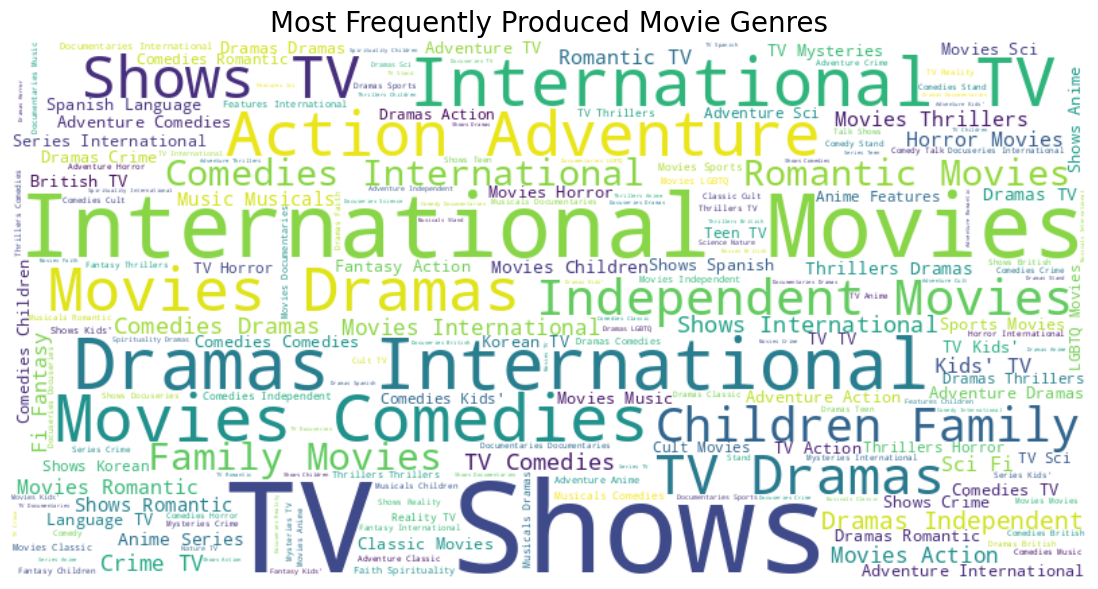

In [ ]:
from wordcloud import WordCloud
df = netflix_expl.copy()
all_genres = ' '.join(df['listed_in'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Produced Movie Genres', fontsize=20)
plt.show()


In [ ]:
netflix_expl["datediff"] = netflix_expl["year_added"]-netflix_expl["release_year"]
netflix_expl.groupby("datediff")["show_id"].nunique().sort_values(ascending=False).head(10)

,show_id
datediff,
0.0,3241
1.0,1585
2.0,714
3.0,491
4.0,367
5.0,261
6.0,251
7.0,187
8.0,185
